# OpenCV
opencv is a library of programming functions mainly aimed at real-time computer vision. We will use it to process images and videos. OpenCV was originally developed by Intel and is now maintained by Willow Garage and ItSeez. opencv-python is the Python API of OpenCV. It combines the best qualities of OpenCV C++ API and Python language.

## Installation

In [2]:
%pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/8a/6f/8aa049b66bcba8b5a4dc872ecfdbcd8603a96704b070fde22222e479c3d7/opencv_python-4.8.0.76-cp37-abi3-macosx_10_16_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 MB 11.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


## Mat - the basic image container
### Goal
We have multiple ways to aquire digital images from the real world: digital cameras, scanners, computed tomography, etc. In every case what we see are images. However, when transferred to a computer, the images are represented as a matrix of numbers. In this section we will learn how to use the Mat class to represent images in OpenCV.

### Basics
The Mat class represents a matrix. It is a 2D array, with each element of the array corresponding to a pixel in the image. The Mat class is defined in the Core module of OpenCV. The Mat class is a template class that can take any number of channels. The Mat class is defined as follows:

Mat< _Tp > class cv::Mat

The Mat class can be used to store photo in python as follows:

In [6]:
# import opencv
import cv2

# create a Mat object to store an image
img1 = cv2.imread('images/cat.webp')

# use the copy method to create a new image
img2 = img1

# modify the img1
img1[0, 0] = [255, 255, 255]

# what is the difference between the four images?
print(img1[0, 0])
print(img2[0, 0])
# img1 and img2 are the same object


[255 255 255]
[255 255 255]


What we can see that img1 and img4 are the same image, but the header is different. The real interesting is that you can headers which refer to subsection of the fall data.


In [7]:
# subsection of an image
img3 = img1[100:200, 200:300]
img3[0, 0] = [0, 0, 0]
print(img1[100, 200])
print(img3[0, 0])


[0 0 0]
[0 0 0]


Now we may wonder - if the matrix itself may belong to multiple Mat objects, how do we know when to deallocate the matrix? The answer is simple - the matrix will be deallocated when the last Mat object referencing it is gone. In other words, the matrix will be deallocated when the header is gone. For example, the following code will deallocate the matrix pointed by img1:

In [8]:
# delocate the memory
del img1, img2, img3

Sometimes we may want to copy the data of a matrix to another matrix. In this case, we can use the copy() method of the Mat class. For example, the following code will copy the data of img1 to img2:

In [12]:
# clone and copy
img1 = cv2.imread('images/cat.webp')
img2 = img1.copy()

# modify the img1
img1[0, 0] = [255, 255, 255]

# what is the difference between the four images?
print(img1[0, 0])
print(img2[0, 0])
# img1 and img2 are different objects
del img1, img2

[255 255 255]
[244 243 241]


### Storing methods
This is about how the pixel value is stored. We can select the color space and the data type of the pixel value. The color space refers to how we combine color components to create colors. The simplest color space is the grayscale color space. In this color space, each pixel is represented by a single number. The number represents the intensity of the pixel. The higher the number, the brighter the pixel. The grayscale color space is also called the intensity color space.

The RGB color space is the most common color space. In this color space, each pixel is represented by three numbers. The three numbers represent the intensity of the red, green and blue components of the pixel. The higher the number, the brighter the component. To code the transparency of a color a fourth component is added. This color space is called RGBA.

There are, however, many other color systems, each with their own advantages:
        RGB - Red, Green, Blue (default) : however OpenCV stores them in BGR order
        HSV - Hue, Saturation, Value and HLS - Hue, Lightness, Saturation : are more natural way to think about colors, we may discard the value or last component to make more robust to lighting changes
        YUV - Luminance, Chrominance : is used in video systems, where Y is the luminance component and U and V are the chrominance components
        YCrCb - Luminance, Red Chrominance, Blue Chrominance  : used for JPEG and MPEG images
        CIE - L*a*b* - Lightness, Red-Green, Blue-Yellow : is designed to approximate human vision, is perceptually uniform color space, meaning that the difference between two colors is perceptually uniform, which come handy if we need to measure distance given two colors

The data type of the pixel value can be unsigned char, signed char, unsigned short, signed short, int, float, double, etc. The data type of the pixel value is specified by the template parameter of the Mat class. Note that increasing the data type will increase the memory required to store the pixel value. 

Examples of how to create a Mat object with different color spaces and data types are shown below:


In [16]:
# images with different color spaces (BGR, GRAY, HSV) and different data types (uint8, float32 , char)
img = cv2.imread('images/cat.webp')
print(img.shape)
print(img.dtype)

# convert the image to gray scale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img_gray.shape)
print(img_gray.dtype)

# convert the image to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
print(img_hsv.shape)
print(img_hsv.dtype)

# convert the image to float32
img_float32 = img.astype(np.float32)
print(img_float32.shape)
print(img_float32.dtype)

# convert the image to uint8
img_uint8 = img.astype(np.uint8)
print(img_uint8.shape)
print(img_uint8.dtype)

# convert the image to char
img_char = img.astype(np.int8)
print(img_char.shape)
print(img_char.dtype)


# delocate the memory
del img, img_gray, img_hsv, img_float32, img_uint8, img_char

(900, 600, 3)
uint8
(900, 600)
uint8
(900, 600, 3)
uint8
(900, 600, 3)
float32
(900, 600, 3)
uint8
(900, 600, 3)
int8


### Creating Mat objects explicitly
We can use cv::imwrite() to write a matrix to an image file. The first parameter is the name of the file. The second parameter is the matrix to be written. The third parameter is an optional parameter specifying the compression method. The default value is 0, which means that the image is not compressed. The following code writes the matrix img1 to the file img1.png:

In [17]:
# imwrite method
img = cv2.imread('images/cat.webp')
cv2.imwrite('images/cat.png', img)

# delocate the memory
del img

However, for debugging purposes, it is convenient to see actual values of the matrix. 

In [30]:
# import numpy
import numpy as np

# 2 by 2 image with 0,0,255 color on all pixels
img = np.full((2, 2, 3), (0, 0, 255), dtype=np.uint8)
print("img shape with 0,0,255 color on all pixels")
print(img)
# 2x2 image with 2 channels
print("2x2 image with 2 channels")
img = np.full((2, 2, 2), 255, dtype=np.uint8)
print(img)
# zeros ones and eye
## 2x2 image with 3 channels and all pixels are 0
print("2x2 image with 3 channels and all pixels are 0")
img = np.zeros((2, 2, 3), dtype=np.uint8)
print(img)
## 2x2 image with 3 channels and all pixels are 1
print("2x2 image with 3 channels and all pixels are 1")
img = np.ones((2, 2, 3), dtype=np.uint8)
print(img)
## eye matrix with 2x2 and 1 channel and all pixels are 1 on the diagonal
print("eye matrix with 2x2 and 1 channel and all pixels are 1 on the diagonal")
img = np.eye(2, dtype=np.uint8)
print(img)

del img



img shape with 0,0,255 color on all pixels
[[[  0   0 255]
  [  0   0 255]]

 [[  0   0 255]
  [  0   0 255]]]
2x2 image with 2 channels
[[[255 255]
  [255 255]]

 [[255 255]
  [255 255]]]
2x2 image with 3 channels and all pixels are 0
[[[0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]]]
2x2 image with 3 channels and all pixels are 1
[[[1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]]]
eye matrix with 2x2 and 1 channel and all pixels are 1 on the diagonal
[[1 0]
 [0 1]]


In [29]:
# clone a row
img = cv2.imread('images/cat.webp')
img_clone = img[0].copy()
img_clone[0] = [255, 255, 255]
print('row')
print(img[0, 0])
print(img_clone[0])

# clone a column
img_clone = img[:, 0].copy()
img_clone[0] = [255, 255, 255]
print('column')
print(img[0, 0])
print(img_clone[0])

del img, img_clone



row
[244 243 241]
[255 255 255]
column
[244 243 241]
[255 255 255]


### Output format
In python we can use the print() function to print the matrix. However, the output is not very readable. We can use the format() method of the Mat class to print the matrix in a more readable format. The format() method takes a format specifier as a parameter. The format specifier is a string that specifies how the matrix should be formatted. The format specifier is similar to the format specifier used in the printf() function of the C language.


## Getting Started with Image

### Goal
In this section we will learn how to use OpenCV to read an image from a file and display the image on the screen. We will also learn how to save an image to a file.

### Source code
This code reads an image from a file and displays the image on the screen. The parameters of imread() function is 
- the name of the file to be read
- the format of the file to be read. The default value is IMREAD_COLOR, which means that the image is read in the BGR format. Other possible values are IMREAD_GRAYSCALE and IMREAD_UNCHANGED.

namedWindow() function is used to create a window in which the image is to be displayed. The parameters of the namedWindow() function are:
- the name of the window
- the flags of the window. The default value is WINDOW_AUTOSIZE, which means that the window is automatically resized to fit the image. Other possible values are WINDOW_NORMAL, which means that the window is not automatically resized, and WINDOW_OPENGL, which means that the window is created for OpenGL support.

imshow() function is used to display the image on the screen. The parameters of the imshow() function are:
- the name of the window in which the image is to be displayed
- the image to be displayed


waitKey() function is used to wait for a key to be pressed, has the following parameter:
- the number of milliseconds to wait for a key to be pressed. The default value is 0, which means that the program waits indefinitely for a key to be pressed.

imwrite() function is used to write the image to a file. The parameters of the imwrite() function are:
- the name of the file to be written
- the image to be written to the file

destroyAllWindows() function is used to destroy all the windows created by the program.

In [1]:
import cv2 as cv
import sys

# read the image
img = cv.imread('images/cat.webp')

# check if the image is loaded
if img is None:
    sys.exit("Could not read the image.")

# create a window
cv.namedWindow('image', cv.WINDOW_NORMAL)

# display the image
cv.imshow('image', img)

# wait for a key
k = cv.waitKey(0)

# if the key pressed is 's'
if k == ord('s'):
    # save the image
    cv.imwrite('images/cat.png', img)
    # destroy all windows
    cv.destroyAllWindows()


2023-09-19 17:16:31.900 Python[7700:471979] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


: 

## Getting Started with Video

### Goal
In this section we will learn how to use OpenCV to read a video from a file and display the video on the screen. We will also learn how to save a video to a file.

### Capture video from camera
To capture a video from a camera, we first need to create a VideoCapture object. The VideoCapture object is created as follows:

In [3]:
# capture video from camera
import cv2 as cv
import numpy as np

# create a VideoCapture object
cap = cv.VideoCapture(0)

# check if the camera is opened
if not cap.isOpened():
    print("Cannot open camera")
    exit()

# read the frame
while True:
    # capture frame by frame
    ret, frame = cap.read()

    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    mirror = cv.flip(gray, 1)
    
    cv.imshow('mirror', mirror)
    # wait for a key
    if cv.waitKey(1) == ord('q'):
        break

# release the capture
cap.release()

# destroy all windows
cv.destroyAllWindows()



cap.read() function is used to read a frame from the video. The parameters of the cap.read() function are:
- the frame to be read from the video

cap.isOpened() function is used to check if the video is opened successfully. The parameters of the cap.isOpened() function are:
- the frame to be read from the video

cap.release() function is used to release the video. The parameters of the cap.release() function are:

cap.get() function is used to get the properties of the video. The parameters of the cap.get() function are:
- the property to be retrieved

cap.set() function is used to set the properties of the video. The parameters of the cap.set() function are:
- the property to be set
- the value of the property to be set

### Play video from file
To play a video from a file, we first need to create a VideoCapture object. The VideoCapture object is created as follows:


In [5]:
# play video from file
import cv2 as cv
import numpy as np

# create a VideoCapture object
cap = cv.VideoCapture('videos/cute.mp4')

while cap.isOpened():
    # read the frame
    ret, frame = cap.read()

    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    mirror = cv.flip(gray, 1)
    
    cv.imshow('mirror', mirror)
    # wait for a key
    if cv.waitKey(1) == ord('q'):
        break



### Save video to file
To save a video to a file, we first need to create a VideoWriter object. The VideoWriter object is created as follows:


In [10]:
# Save video
import cv2 as cv
import numpy as np

# create a VideoCapture object
cap = cv.VideoCapture(0)

# define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'MJPG')
out = cv.VideoWriter('videos/output.mp4', fourcc, 20.0, (640, 480))

while cap.isOpened():
    # read the frame
    ret, frame = cap.read()

    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    mirror = cv.flip(gray, 1)
    # make it look cartoonish
    mirror = cv.medianBlur(mirror, 5)
    # add edge detection
    mirror = cv.Canny(mirror, 100, 200)
    
    # write the flipped frame
    out.write(mirror)
    
    cv.imshow('mirror', mirror)
    # wait for a key
    if cv.waitKey(1) == ord('q'):
        break

# release the capture
cap.release()

# release the output
out.release()

# destroy all windows
cv.destroyAllWindows()


OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


video.write() function is used to write a frame to the video. The parameters of the video.write() function are:
- the frame to be written to the video

VideoWriter_fourcc() function is used to create a four character code (FOURCC) for the video codec.
FourCC is a 4-byte code used to specify the video codec. The list of available codes can be found in fourcc.org. It is platform dependent. The following codecs work fine for me.

In Fedora: DIVX, XVID, MJPG, X264, WMV1, WMV2. (XVID is more preferable. MJPG results in high size video. X264 gives very small size video)
In Windows: DIVX (More to be tested and added)
In OSX: MJPG (.mp4), DIVX (.avi), X264 (.mkv).
FourCC code is passed as `cv.VideoWriter_fourcc('M','J','P','G')or cv.VideoWriter_fourcc(*'MJPG')` for MJPG.


## Getting Started with Drawing

### Goal
In this section we will learn how to use OpenCV to draw lines, rectangles, circles, ellipses, polygons, text and put images on an image.

### Drawing lines
line() function is used to draw a line on an image. The parameters of the line() function are:
- the image on which the line is to be drawn
- the starting point of the line
- the ending point of the line
- the color of the line
- the thickness of the line

In [13]:
# draw a line
import cv2 as cv
import numpy as np

# create a black image
img = np.zeros((512, 512, 3), np.uint8)

# draw a diagonal blue line with thickness of 5 px
img = cv.line(img, (0, 0), (511, 511), (255, 0, 0), 5)

# display the image
cv.imshow('image', img)

# wait for a key
cv.waitKey(0)

# destroy all windows
cv.destroyAllWindows()


### Drawing rectangles
rectangle() function is used to draw a rectangle on an image. The parameters of the rectangle() function are:
- the image on which the rectangle is to be drawn
- the top-left corner of the rectangle
- the bottom-right corner of the rectangle
- the color of the rectangle
- the thickness of the rectangle

In [14]:
# draw a rectangle with thickness of 3 px and green color
img = cv.rectangle(img, (384, 0), (510, 128), (0, 255, 0), 3)

# display the image
cv.imshow('image', img)

# wait for a key
cv.waitKey(0)

# destroy all windows
cv.destroyAllWindows()

### Drawing circles
circle() function is used to draw a circle on an image. The parameters of the circle() function are:
- the image on which the circle is to be drawn
- the center of the circle
- the radius of the circle
- the color of the circle
- the thickness of the circle


In [15]:
# draw a circle with thickness of -1 px and red color
img = cv.circle(img, (447, 63), 63, (0, 0, 255), -1)

# display the image
cv.imshow('image', img)

# wait for a key
cv.waitKey(0)

# destroy all windows
cv.destroyAllWindows()

### Drawing ellipses
ellipse() function is used to draw an ellipse on an image. The parameters of the ellipse() function are:
- the image on which the ellipse is to be drawn
- the center of the ellipse
- the axes of the ellipse
- the angle of rotation of the ellipse
- the starting angle of the ellipse
- the ending angle of the ellipse
- the color of the ellipse
- the thickness of the ellipse

In [17]:
# draw an ellipse with thickness of -1 px of angle 0 and 180 degrees and blue color
img = cv.ellipse(img, (256, 256), (100, 50), 0, 0, 180, 255, -1)

# display the image
cv.imshow('image', img)

# wait for a key
cv.waitKey(0)

# destroy all windows
cv.destroyAllWindows()


### Drawing polygons
polylines() function is used to draw a polygon on an image. The parameters of the polylines() function are:
- the image on which the polygon is to be drawn
- the points of the polygon
- the color of the polygon
- the thickness of the polygon

Note that the points of the polygon are passed as a list of points. Each point is a tuple of two integers. The first integer is the x-coordinate of the point. The second integer is the y-coordinate of the point. The points are connected by straight lines. The last point is connected to the first point. Can be used to draw multiple lines. Better and faster way to draw a group of lines than calling cv2.line() for each line.


In [19]:
# draw a polygon with thickness of -1 px and yellow color
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(img,[pts],True,(0,255,255))

# display the image
cv.imshow('image', img)

# wait for a key
cv.waitKey(0)

# destroy all windows
cv.destroyAllWindows()

### Drawing text
putText() function is used to draw text on an image. The parameters of the putText() function are:
- the image on which the text is to be drawn
- the text to be drawn
- the position of the text
- the font of the text
- the size of the text
- the color of the text
- the thickness of the text

In [20]:
# add text to the image
font = cv.FONT_HERSHEY_SIMPLEX

cv.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv.LINE_AA)

# display the image
cv.imshow('image', img)

# wait for a key
cv.waitKey(0)

# destroy all windows
cv.destroyAllWindows()

#### OpenCV logo

In [88]:
## OpenCv logo
# create a black image
img = np.zeros((512, 512, 3), np.uint8)

# draw the red C on top center
img = cv.circle(img, (256, 128), 100, (0, 0, 255), -1)
img = cv.circle(img, (256, 128), 50, (0, 0, 0), -1)
# draw a filled triangle
pts = np.array([[256, 128], [190, 256], [320, 256]], np.int32)
pts = pts.reshape((-1, 1, 2))
img = cv.fillPoly(img, [pts], (0, 0, 0))

# draw the green C on bottom left
img = cv.circle(img, (128, 384), 100, (0, 255, 0), -1)
img = cv.circle(img, (128, 384), 50, (0, 0, 0), -1)
# draw a filled triangle for the green C
pts = np.array([[128, 384], [190, 256], [256, 356]], np.int32)
pts = pts.reshape((-1, 1, 2))
img = cv.fillPoly(img, [pts], (0, 0, 0))

# draw the blue C on bottom right
img = cv.circle(img, (384, 384), 100, (255, 0, 0), -1)
img = cv.circle(img, (384, 384), 50, (0, 0, 0), -1)
# draw a filled triangle to open the blue C from the top
pts = np.array([[384, 384], [448, 256], [320, 256]], np.int32)
pts = pts.reshape((-1, 1, 2))
img = cv.fillPoly(img, [pts], (0, 0, 0))

# display the image
cv.imshow('image', img)

# wait for a key
cv.waitKey(0)

# destroy all windows
cv.destroyAllWindows()

: 

![opencv](images/opencv_logo.png)

## Mouse as a Paint-Brush

### Goal
Learn to handle mouse events in OpenCV and OpenCV callbacks

### Simple Demo
We will create a simple application which draws a circle when we left-click on the image, and a rectangle when we right-click on it.

First we create a mouse callback function which is executed when a mouse event take place. Mouse event can be anything related to mouse like left-button down, left-button up, left-button double-click etc. It gives us the coordinates (x,y) for every mouse event. With this event and location, we can do whatever we like. To list all available events available, run the following code in Python terminal:

In [1]:
import cv2 as cv
events = [i for i in dir(cv) if 'EVENT' in i]
print(events)


['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


Creating mouse callback function has a specific format which is same everywhere. It differs only in what the function does. So our mouse callback function does two things, it draws either rectangles or circles (depending on the mode we select) and it also tracks the position where we click. So see the code below. Code is self-explanatory from comments :

In [2]:
import numpy as np
import cv2 as cv

# mouse callback function
def draw_circle(event,x,y,flags,param):
    # if left button is pressed
    if event == cv.EVENT_LBUTTONDOWN:
        # draw a circle
        cv.circle(img,(x,y),100,(255,0,0),-1)
    # if right button is pressed
    elif event == cv.EVENT_RBUTTONDOWN:
        # draw a rectangle
        cv.rectangle(img,(x,y),(x+100,y+100),(0,255,0),-1)

# create a black image
img = np.zeros((512,512,3), np.uint8)
# create a window
cv.namedWindow('image')
# bind the function to window
cv.setMouseCallback('image',draw_circle)

while(1):
    # display the image
    cv.imshow('image',img)
    # wait for a key 27 is the ESC key
    if cv.waitKey(20) & 0xFF == 27:
        break
# destroy all windows
cv.destroyAllWindows()

2023-09-20 20:06:55.129 Python[9435:650931] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


### More Advanced Demo
Now we go for much more better application. In this, we draw either rectangles or circles (depending on the mode we select) by dragging the mouse like we do in Paint application. So our mouse callback function has two parts, one to draw rectangle and other to draw the circles. This specific example will be really helpful in creating and understanding some interactive applications like object tracking, image segmentation etc.

Here we draw either rectangles or circles (depending on the mode we select) by dragging the mouse like we do in Paint application. So our mouse callback function has two parts, one to draw rectangle and other to draw the circles. This specific example will be really helpful in creating and understanding some interactive applications like object tracking, image segmentation etc.

In [4]:
import numpy as np
import cv2 as cv

drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    # if left button is pressed
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    # if mouse is moving
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                # draw a rectangle
                cv.rectangle(img,(ix,iy),(x,y),(0,255,0),3)
            else:
                # draw a circle
                cv.circle(img,(x,y),5,(0,0,255),-1)

    # if left button is released
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            # draw a rectangle
            cv.rectangle(img,(ix,iy),(x,y),(0,255,0),3)
        else:
            # draw a circle
            cv.circle(img,(x,y),5,(0,0,255),-1)

# create a black image
img = np.zeros((512,512,3), np.uint8)
# create a window
cv.namedWindow('image')
# bind the function to window
cv.setMouseCallback('image',draw_circle)

while(1):
    # display the image
    cv.imshow('image',img)
    # wait for a key 27 is the ESC key
    k = cv.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
# destroy all windows
cv.destroyAllWindows()


## Trackbar as the Color Palette

### Goal
Learn to bind trackbar to OpenCV windows, get trackbar events, get trackbar values, trackbar as the Color Palette

### Code Demo

Here we will create a simple application which shows the color you specify. You have a window which shows the color and three trackbars to specify each of B,G,R colors. You slide the trackbar and correspondingly window color changes. By default, initial color will be set to Black.

There are two important things to be noted:

    For cv2.getTrackbarPos() function, first argument is the trackbar name, second one is the window name to which it is attached, third argument is the default value, fourth one is the maximum value and fifth one is the callback function which is executed everytime trackbar value changes. The callback function always has a default argument which is the trackbar position. In our case, function does nothing, so we simply pass.

    Another important application of trackbar is to use it as a button or switch. OpenCV, by default, doesn’t have button functionality. So you can use trackbar to get such functionality. In our application, we have created one switch in which application works only if switch is ON, otherwise screen is always black.

In [2]:
import numpy as np
import cv2 as cv

def nothing(x):
    pass

# create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv.namedWindow('image')

# create trackbars for color change
cv.createTrackbar('R','image',0,255,nothing)
cv.createTrackbar('G','image',0,255,nothing)
cv.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    # display the image
    cv.imshow('image',img)
    # wait for a key 27 is the ESC key
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break

    # get current positions of four trackbars
    r = cv.getTrackbarPos('R','image')
    g = cv.getTrackbarPos('G','image')
    b = cv.getTrackbarPos('B','image')
    s = cv.getTrackbarPos(switch,'image')

    # if switch is ON
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

# destroy all windows
cv.destroyAllWindows()



### More Advanced Demo
Here we will create a paint application which lets us draw circles in different colors. So you have a window which shows the color palette along with some radio button to choose color, a window where you can draw anything and trackbars to specify the size of the brush.

In [ ]:
import numpy as np
import cv2 as cv

drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    # get color and thickness from trackbar
    r = cv.getTrackbarPos('R','image')
    g = cv.getTrackbarPos('G','image')
    b = cv.getTrackbarPos('B','image')
    t = cv.getTrackbarPos('T','image')
    color = (b,g,r)
    # if left button is pressed
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    # if mouse is moving
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                # draw a circle
                cv.circle(img,(x,y),t,color,-1)
            else:
                # draw a rectangle
                cv.rectangle(img,(ix,iy),(x,y),color,-1)
    # if left button is released
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            # draw a circle
            cv.circle(img,(x,y),t,color,-1)
        else:
            # draw a rectangle
            cv.rectangle(img,(ix,iy),(x,y),color,-1)

# create a black image
img = np.zeros((512,512,3), np.uint8)
# create a window
cv.namedWindow('image')
# bind the function to window
cv.setMouseCallback('image',draw_circle)

# create trackbars for color change
cv.createTrackbar('R','image',0,255,lambda x: x)
cv.createTrackbar('G','image',0,255,lambda x: x)
cv.createTrackbar('B','image',0,255,lambda x: x)
# create trackbar for thickness
cv.createTrackbar('T','image',1,100,lambda x: x)

while(1):
    # display the image
    cv.imshow('image',img)
    # wait for a key 27 is the ESC key
    k = cv.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
# destroy all windows
cv.destroyAllWindows()

: 

## Basic Operations on Images\
### Goal
Learn to:

    Access pixel values and modify them
    Access image properties
    Setting Region of Image (ROI)
    Splitting and Merging images

### Accessing and Modifying pixel values
Let’s load a color image first:


In [1]:
import numpy as np
import cv2 as cv

img = cv.imread('images/cat.webp')
assert img is not None, "Could not read the image."

Now you can access the pixel value by row and column coordinates. For BGR image, it returns an array of Blue, Green, Red values. For grayscale image, just corresponding intensity is returned.

In [2]:
px = img[100, 100]
print(px)

# accessing only blue pixel
blue = img[100, 100, 0]
print(blue)

# modify the pixel values
img[100, 100] = [255, 255, 255]
print(img[100, 100])


[235 234 238]
235
[255 255 255]


#### Warning
Numpy is a optimized library for fast array calculations. So simply accessing each and every pixel values and modifying it will be very slow and it is discouraged.

#### Note
Above mentioned method is normally used for selecting a region of array, say first 5 rows and last 3 columns like that. For individual pixel access, Numpy array methods, array.item() and array.itemset() is considered to be better. But it always returns a scalar. So if you want to access all B,G,R values, you need to call array.item() separately for all.

Better pixel accessing and editing method :

In [3]:
# accessing RED value
print(img.item(10, 10, 2))

# modifying RED value
img.itemset((10, 10, 2), 100)
print(img.item(10, 10, 2))


241
100


### Accessing Image Properties
Image properties include number of rows, columns and channels, type of image data, number of pixels etc.

Shape of image is accessed by img.shape. It returns a tuple of number of rows, columns and channels (if image is color):

In [5]:
img.shape

(900, 600, 3)

#### Note
If image is grayscale, tuple returned contains only number of rows and columns. So it is a good method to check if loaded image is grayscale or color image.

Total number of pixels is accessed by img.size and it returns a number of pixels. Image datatype is obtained by img.dtype.


In [6]:
print(img.size)
print(img.dtype)

1620000
uint8


### Image ROI

Sometimes, you will have to play with certain region of images. For eye detection in images, first perform face detection over the image until the face is found, then search within the face region for eyes. This approach improves accuracy (because eyes are always on faces :D ) and performance (because we search for a small area).

ROI is again obtained using Numpy indexing. Here I am selecting the ball and copying it to another region in the image:

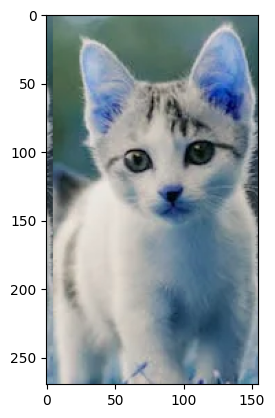

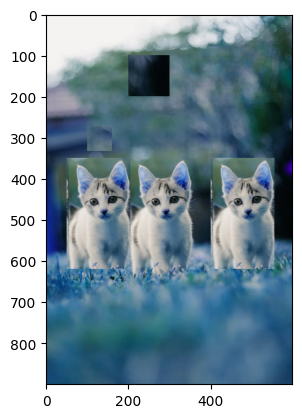

In [16]:
import matplotlib.pyplot as plt

cat = img[350:620, 200:355]
plt.imshow(cat)
plt.show()

img[350:620, 50:205] = cat
img[350:620, 400:555] = cat
plt.imshow(img)
plt.show()



### Splitting and Merging Image Channels
The B,G,R channels of an image can be split into their individual planes when needed. Then, the individual channels can be merged back together to form a BGR image again. This can be performed by:

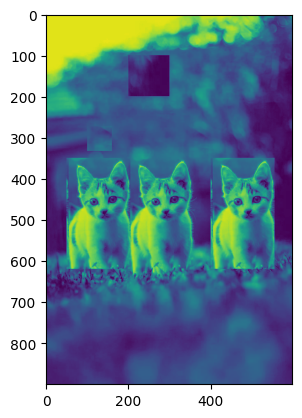

In [20]:
b, g, r = cv.split(img)
img = cv.merge((b, g, r))
# or
b = img[:, :, 0]
plt.imshow(b)

suppose we want to set all the red pixels to zero, we do not need to split the channels first. Numpy indexing is faster.

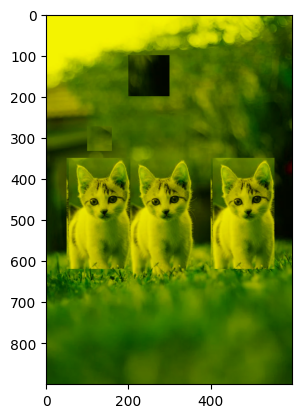

In [22]:
img[:, :, 2] = 0
plt.imshow(img)

#### Warning
cv.split() is a costly operation (in terms of time), so only use it if necessary. Numpy indexing is much more efficient and should be used if possible.

### Making Borders for Images (Padding)

If you want to create a border around the image, something like a photo frame, you can use cv.copyMakeBorder() function. But it has more applications for convolution operation, zero padding etc. This function takes following arguments:

    src - input image
    top, bottom, left, right - border width in number of pixels in corresponding directions
    borderType - Flag defining what kind of border to be added. It can be following types:
        cv.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.
        cv.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
        cv.BORDER_REFLECT_101 or cv.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
        cv.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
        cv.BORDER_WRAP - Can’t explain, it will look like this : cdefgh|abcdefgh|abcdefg
    value - Color of border if border type is cv.BORDER_CONSTANT

Below is a sample code demonstrating all these border types for better understanding:


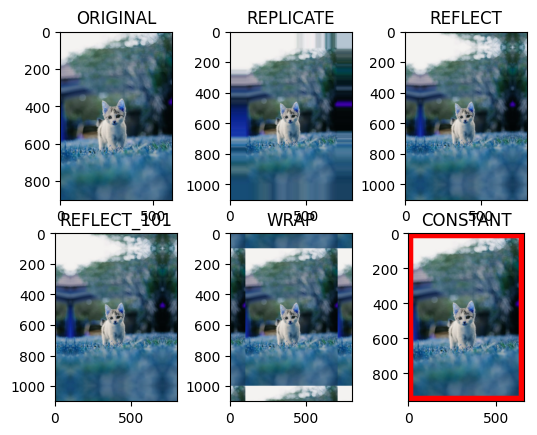

: 

In [28]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

BLUE = [255, 0, 0]

img1 = cv.imread('images/cat.webp')
assert img1 is not None, "Could not read the image."

replicate = cv.copyMakeBorder(img1, 100, 100, 100, 100, cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1, 100, 100, 100, 100, cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1, 100, 100, 100, 100, cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1, 100, 100, 100, 100, cv.BORDER_WRAP)
constant = cv.copyMakeBorder(img1, 30, 30, 30, 30, cv.BORDER_CONSTANT, value=BLUE)

plt.subplot(231), plt.imshow(img1, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')

plt.show()

## Arithmetic Operations on Images

### Goal
Learn several arithmetic operations on images like addition, subtraction, bitwise operations etc.

### Image Addition
You can add two images by OpenCV function, cv.add() or simply by numpy operation, res = img1 + img2. Both images should be of same depth and type, or second image can just be a scalar value.

#### Note
There is a difference between OpenCV addition and Numpy addition. OpenCV addition is a saturated operation while Numpy addition is a modulo operation.

For example, consider below sample:

In [1]:
import cv2 as cv
import numpy as np
x = np.uint8([250])
y = np.uint8([10])

print(cv.add(x, y)) # 250+10 = 260 => 255

print(x + y) # 250+10 = 260 % 256 = 4

[[255]]
[4]


This result will be more visible when you add two images. OpenCV function will provide a better result. So always better stick to OpenCV functions.

### Image Blending
This is also image addition, but different weights are given to images so that it gives a feeling of blending or transparency. Images are added as per the equation below:
$$
g(x) = (1 - \alpha)f_0(x) + \alpha f_1(x)
$$
By varying $\alpha$ from 0 $\rightarrow$ 1, you can perform a cool transition between one image to another.

Here I took two images to blend them together. First image is given a weight of 0.7 and second image is given 0.3. cv.addWeighted() applies following equation on the image.

$$
dst = \alpha \cdot img1 + \beta \cdot img2 + \gamma
$$

Here $\gamma$ is taken as zero.

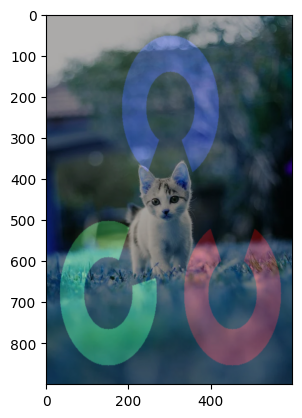

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img1 = cv.imread('images/cat.webp')
assert img1 is not None, "Could not read the image."

img2 = cv.imread('images/opencv_logo.png')
assert img2 is not None, "Could not read the image."

# ajust size of the logo to be the same as the cat
img2 = cv.resize(img2, (img1.shape[1], img1.shape[0]))

# add the images
dst = cv.addWeighted(img1, 0.7, img2, 0.3, 0)
plt.imshow(dst)
plt.show()



### Bitwise Operations

This includes bitwise AND, OR, NOT and XOR operations. They will be highly useful while extracting any part of the image (as we will see in coming chapters), defining and working with non-rectangular ROI etc. Below we will see an example on how to change a particular region of an image.

I want to put OpenCV logo above an image. If I add two images, it will change color. If I blend it, I get an transparent effect. But I want it to be opaque. If it was a rectangular region, I could use ROI as we did in last chapter. But OpenCV logo is a not a rectangular shape. So you can do it with bitwise operations as below:


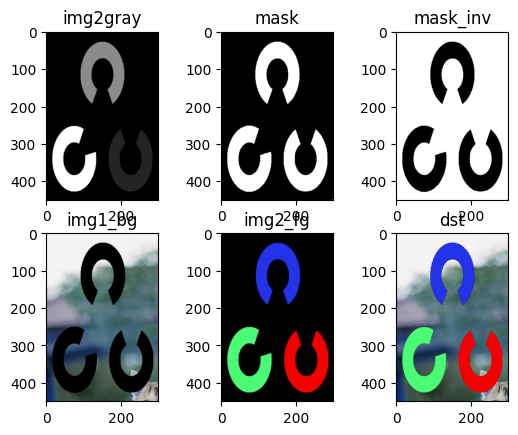

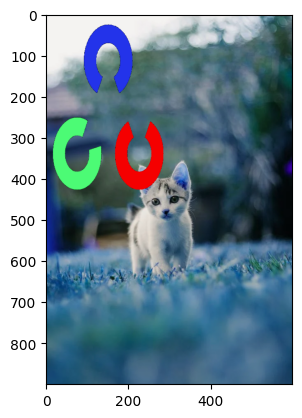

In [21]:
# Load two images
img1 = cv.imread('images/cat.webp')
assert img1 is not None, "Could not read the image."

img2 = cv.imread('images/opencv_logo.png')
assert img2 is not None, "Could not read the image."
# make the size of the logo half of the cat
img2 = cv.resize(img2, (int(img1.shape[1]/2), int(img1.shape[0]/2)))

# I want to put logo on top-left corner, So I create a ROI
rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi, roi, mask=mask_inv)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2, img2, mask=mask)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg, img2_fg)
img1[0:rows, 0:cols] = dst

## show the images img2gray, mask, mask_inv, img1_bg, img2_fg, dst
plt.subplot(231), plt.imshow(img2gray, 'gray'), plt.title('img2gray')
plt.subplot(232), plt.imshow(mask, 'gray'), plt.title('mask')
plt.subplot(233), plt.imshow(mask_inv, 'gray'), plt.title('mask_inv')
plt.subplot(234), plt.imshow(img1_bg, 'gray'), plt.title('img1_bg')
plt.subplot(235), plt.imshow(img2_fg, 'gray'), plt.title('img2_fg')
plt.subplot(236), plt.imshow(dst, 'gray'), plt.title('dst')
plt.show()
plt.imshow(img1)



### slide show
Creating a slideshow from images is as follows:

In [27]:
# Slide show of images in a folder with smooth transition between images using addWeighted method
import cv2 as cv
import numpy as np
import os
import time

# get the images in the folder
images = [img for img in os.listdir("images") if img.endswith(".png")]
# sort the images
images.sort()

# create a window
cv.namedWindow('image')

# create a black image
image = np.zeros((200, 200, 3), np.uint8)
# loop over the images
for img in images:
    # read the image
    image = cv.imread('images/' + img)
    # rezie the image
    image = cv.resize(image, (200, 200))
    # display the image gradually
    for alpha in np.arange(0, 1, 0.01):
        beta = 1 - alpha
        dst = cv.addWeighted(image, alpha, image, beta, 0.0)
        cv.imshow('image', dst)
        cv.waitKey(1)
        time.sleep(0.01)
    # destroy all windows
    cv.destroyAllWindows()

# destroy all windows
cv.destroyAllWindows()


KeyboardInterrupt: 

: 

## Performance Measurement and Improvement Techniques

### Goal
Learn to measure the performance of your code.

### Measuring Performance with OpenCV
cv2.getTickCount function returns the number of clock-cycles after a reference event (like the moment machine was switched ON) to the moment this function is called. So if you call it before and after the function execution, you get number of clock-cycles used to execute a function.

cv2.getTickFrequency function returns the frequency of clock-cycles, or the number of clock-cycles per second. So to find the time of execution in seconds, you can do following:

In [3]:
import cv2 as cv

e1 = cv.getTickCount()
# your code execution
e2 = cv.getTickCount()
time = (e2 - e1)/cv.getTickFrequency()
time

1.8458e-05

We will see an example for that below:

In [4]:
img1 = cv.imread('images/cat.webp')
assert img1 is not None, "Could not read the image."

e1 = cv.getTickCount()
for i in range(5, 49, 2):
    img1 = cv.medianBlur(img1, i)
e2 = cv.getTickCount()
time = (e2 - e1)/cv.getTickFrequency()
print(time)


0.769393041


#### Note
You can do the same with time module. Instead of cv2.getTickCount, use time.time() function. Then take the difference of two times.

### Default Optimization in OpenCV
Many of the OpenCV functions are optimized using SSE2, AVX etc. It contains unoptimized code also. So if our system support these features, we should exploit them (almost all modern day processors support them). It is enabled by default while compiling. So OpenCV runs the optimized code if it is enabled, else it runs the unoptimized code. You can use cv2.useOptimized() to check if it is enabled/disabled and cv2.setUseOptimized() to enable/disable it. Let’s see a simple example.

In [5]:
# check if optimization is enabled
cv.useOptimized()

True

In [6]:
%timeit res = cv.medianBlur(img1, 49)

28.3 ms ± 104 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
# Disable it
cv.setUseOptimized(False)
cv.useOptimized()

False

In [8]:
%timeit res = cv.medianBlur(img1, 49)

28.2 ms ± 92.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


We can see in our case, optmized mean filtering is no different from unoptimized version. It's porbably because my CPU is a new arm64 CPU, and the optimized version is not available yet. It should be different on a x86 CPU.

### Measuring Performance in IPython
Sometimes you may need to compare the performance of two similar operations. IPython gives you a magic command timeit to perform this. It runs the code several times to get more accurate results. Once again, they are suitable to measure single line codes.

For example, to compare the performance of cv2.countNonZero and np.count_nonzero() functions, IPython gives following result.


In [13]:
import cv2 as cv
import numpy as np
x = 5
%timeit y = x**2

30.1 ns ± 0.132 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [14]:
%timeit y = x*x

20.7 ns ± 0.157 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [16]:
z = np.uint8([5])
%timeit y = z*z

385 ns ± 1.36 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [17]:
%timeit y = np.square(z)

367 ns ± 1.57 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


You can see the speed of diffrent operations, x = 5 ; x*x is fastest and around 20 times faster compared to numpy.

#### Note
Python scalar operations are faster than Numpy scalar operations. So for operations including one or two elements, Python scalar is better than Numpy arrays. Numpy takes advantage when size of array is a little bit bigger.

we will see one more example:

In [22]:
img = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
%timeit z = cv.countNonZero(img)

36.5 µs ± 233 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [23]:
%timeit z = np.count_nonzero(img)

18.4 µs ± 50.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In this, numpy is faster than cv2 function.

#### Note
Normally, OpenCV functions are faster than Numpy functions. So for same operation, OpenCV functions are preferred. But, there can be exceptions, especially when Numpy works with views instead of copies.

### More IPython magic commands
There are several other magic commands to measure performance with more accuracy. But since they are not much used, I am not going to explain them here. You can see Python documentation if you want to explore more about them.

### Performance Optimization Techniques
Now we will see some tips to improve the performance of our code.

- Avoid using loops in Python as far as possible, especially double/triple loops etc. They are inherently slow.

- Vectorize the algorithm/code to the maximum possible extent because Numpy and OpenCV are optimized for vector operations.

- Exploit the cache coherence.

- Never make copies of array unless it is needed. Try to use views instead. Array copying is a costly operation.

## Changing Colorspaces

### Goal
Learn to change images between different color spaces. Plus learn to track different colored objects, like we find a red ball in an image.

### Changing Color-space
There are more than 150 color-space conversion methods available in OpenCV. But we will look into only two which are most widely used ones, BGR $\leftrightarrow$ Gray and BGR $\leftrightarrow$ HSV.

For color conversion, we use the function cv2.cvtColor(input_image, flag) where flag determines the type of conversion.

For BGR $\leftrightarrow$ Gray conversion we use the flags cv2.COLOR_BGR2GRAY and cv2.COLOR_GRAY2BGR

For BGR $\leftrightarrow$ HSV conversion we use the flags cv2.COLOR_BGR2HSV and cv2.COLOR_HSV2BGR

To get other flags, just run following commands in your Python terminal :

In [24]:
import cv2 as cv
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

#### Note
For HSV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]. Different softwares use different scales. So if you are comparing OpenCV values with them, you need to normalize these ranges.

### Object Tracking
Now we know how to convert BGR image to HSV, we can use this to extract a colored object. In HSV, it is more easier to represent a color than RGB color-space. In our application, we will try to extract an object. So here is the method:

    Take each frame of the video
    Convert from BGR to HSV color-space
    We threshold the HSV image for a range of BGR values we want to detect
    Now extract the the object alone, we can do whatever on that image we want.

Below is the code which are commented in detail :

In [25]:
import cv2 as cv
import numpy as np

cap = cv.VideoCapture(0)

while(1):
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110, 50, 50])
    upper_blue = np.array([130, 255, 255])
    # define range of green color in HSV
    lower_green = np.array([50, 50, 50])
    upper_green = np.array([70, 255, 255])
    # define range of red color in HSV
    lower_red = np.array([0, 50, 50])
    upper_red = np.array([10, 255, 255])
    # Threshold the HSV image to get only blue colors
    mask_blue = cv.inRange(hsv, lower_blue, upper_blue)
    # Threshold the HSV image to get only green colors
    mask_green = cv.inRange(hsv, lower_green, upper_green)
    # Threshold the HSV image to get only red colors
    mask_red = cv.inRange(hsv, lower_red, upper_red)
    # Bitwise-AND mask and original image
    res_blue = cv.bitwise_and(frame, frame, mask=mask_blue)
    res_green = cv.bitwise_and(frame, frame, mask=mask_green)
    res_red = cv.bitwise_and(frame, frame, mask=mask_red)
    # show the images
    cv.imshow('frame', frame)
    cv.imshow('mask_blue', mask_blue)
    cv.imshow('res_blue', res_blue)
    cv.imshow('mask_green', mask_green)
    cv.imshow('res_green', res_green)
    cv.imshow('mask_red', mask_red)
    cv.imshow('res_red', res_red)
    # wait for a key 27 is the ESC key
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break
# destroy all windows
cv.destroyAllWindows()

2023-09-25 20:34:16.805 Python[18388:1164248] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


#### Note
There are some noises in the image. We have to remove them. We can do it using morphological operations. Erosion and dilation. We have already seen them in previous chapters.

### How to find HSV values to track?
This is a common question found in stackoverflow.com. It is very simple and you can use the same function, cv2.cvtColor(). Instead of passing an image, you just pass the BGR values you want. For example, to find the HSV value of Green, try following commands in Python terminal:

In [26]:
green = np.uint8([[[0, 255, 0]]])
hsv_green = cv.cvtColor(green, cv.COLOR_BGR2HSV)
print(hsv_green)

[[[ 60 255 255]]]


: 

Now you take [H-10, 100,100] and [H+10, 255, 255] as lower bound and upper bound respectively. Apart from this method, you can use any image editing tools like GIMP or any online converters to find these values, but don’t forget to adjust the HSV ranges.

## Geometric Transformations of Images

### Goal
Learn to apply different geometric transformation to images like translation, rotation, affine transformation etc.

### Transformations

OpenCV provides two transformation functions, cv2.warpAffine and cv2.warpPerspective, with which you can have all kinds of transformations. cv2.warpAffine takes a 2x3 transformation matrix while cv2.warpPerspective takes a 3x3 transformation matrix as input.

#### Scaling
Scaling is just resizing of the image. OpenCV comes with a function cv2.resize() for this purpose. The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used. Preferable interpolation methods are cv2.INTER_AREA for shrinking and cv2.INTER_CUBIC (slow) & cv2.INTER_LINEAR for zooming. By default, interpolation method used is cv2.INTER_LINEAR for all resizing purposes. You can resize an input image either of following methods:


(<Axes: title={'center': '(2*width, 2*height)'}>,
 Text(0.5, 1.0, '(2*width, 2*height)'))

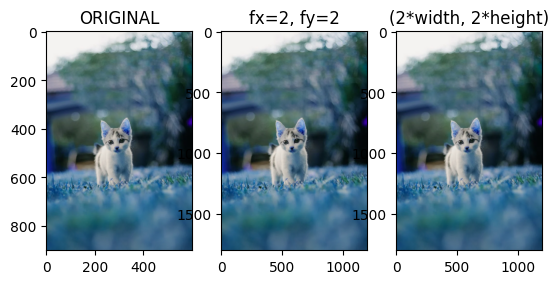

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('images/cat.webp')
assert img is not None, "Could not read the image."

res1 = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)
# OR
height, width = img.shape[:2]
res2 = cv.resize(img, (2*width, 2*height), interpolation=cv.INTER_CUBIC)

plt.subplot(131), plt.imshow(img), plt.title('ORIGINAL')
plt.subplot(132), plt.imshow(res1), plt.title('fx=2, fy=2')
plt.subplot(133), plt.imshow(res2), plt.title('(2*width, 2*height)')

#### Translation
Translation is the shifting of object’s location. If you know the shift in (x,y) direction, let it be (t_x,t_y), you can create the transformation matrix M as follows:

$$
M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}
$$

You can take make it into a Numpy array of type np.float32 and pass it into cv2.warpAffine() function. See below example for a shift of (100,50):

(<Axes: title={'center': 'TRANSLATION'}>,
 Text(0.5, 1.0, 'TRANSLATION'))

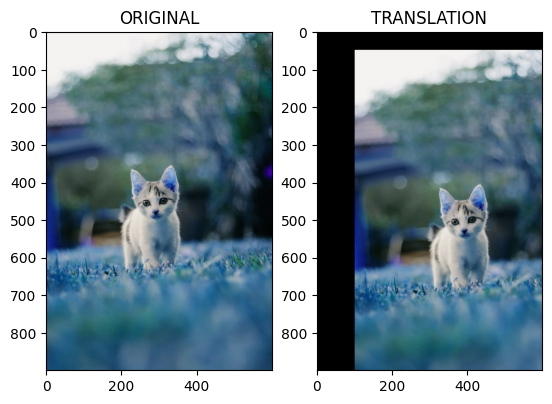

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('images/cat.webp')
assert img is not None, "Could not read the image."
rows, cols, ch = img.shape

M = np.float32([[1, 0, 100], [0, 1, 50]])
dst = cv.warpAffine(img, M, (cols, rows))

plt.subplot(121), plt.imshow(img), plt.title('ORIGINAL')
plt.subplot(122), plt.imshow(dst), plt.title('TRANSLATION')

##### Warning
Third argument of the cv2.warpAffine() function is the size of the output image, which should be in the form of **(width, height)**. Remember width = number of columns, and height = number of rows.

#### Rotation
Rotation of an image for an angle $\theta$ is achieved by the transformation matrix of the form

$$
M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}
$$

But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. Modified transformation matrix is given by

$$
\begin{bmatrix} \alpha & \beta & (1- \alpha ) \cdot center.x - \beta \cdot center.y \\ -\beta & \alpha & \beta \cdot center.x + (1 - \alpha ) \cdot center.y \end{bmatrix}
$$

where

$$
\begin{array}{l} \alpha = scale \cdot \cos \theta , \\ \beta = scale \cdot \sin \theta \end{array}
$$

To find this transformation matrix, OpenCV provides a function, cv2.getRotationMatrix2D. Check below example which rotates the image by 90 degree with respect to center without any scaling.

(<Axes: title={'center': 'ROTATION'}>,
 Text(0.5, 1.0, 'ROTATION'))

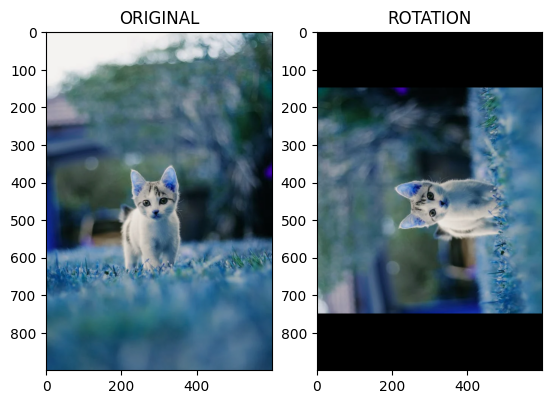

In [2]:
img = cv.imread('images/cat.webp')
assert img is not None, "Could not read the image."

rows, cols, ch = img.shape

# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0), 90, 1)
dst = cv.warpAffine(img, M, (cols, rows))

plt.subplot(121), plt.imshow(img), plt.title('ORIGINAL')
plt.subplot(122), plt.imshow(dst), plt.title('ROTATION')


#### Affine Transformation
In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from input image and their corresponding locations in output image. Then cv2.getAffineTransform will create a 2x3 matrix which is to be passed to cv2.warpAffine.

Check below example, and also look at the points I selected (which are marked in Green color):

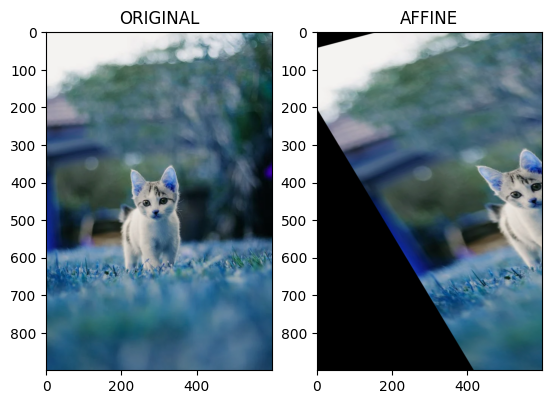

In [3]:
img = cv.imread('images/cat.webp')
assert img is not None, "Could not read the image."
rows, cols, ch = img.shape

pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

M = cv.getAffineTransform(pts1, pts2)

dst = cv.warpAffine(img, M, (cols, rows))

plt.subplot(121), plt.imshow(img), plt.title('ORIGINAL')
plt.subplot(122), plt.imshow(dst), plt.title('AFFINE')
plt.show()

#### Perspective Transformation
For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be found by the function cv2.getPerspectiveTransform. Then apply cv2.warpPerspective with this 3x3 transformation matrix.

See the code below:

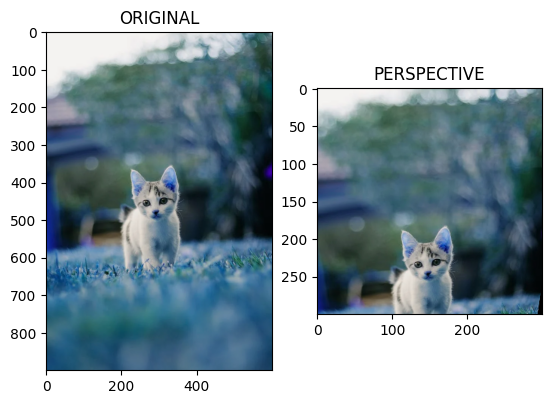

In [4]:
img = cv.imread('images/cat.webp')
assert img is not None, "Could not read the image."
rows, cols, ch = img.shape

pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
pts2 = np.float32([[0, 0], [200, 0], [0, 200], [200, 200]])

M = cv.getPerspectiveTransform(pts1, pts2)

dst = cv.warpPerspective(img, M, (300, 300))

plt.subplot(121), plt.imshow(img), plt.title('ORIGINAL')
plt.subplot(122), plt.imshow(dst), plt.title('PERSPECTIVE')
plt.show()
